In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import os
from pprint import pprint
import quantities as pq
import neuronunit
from neuronunit.models.reduced import ReducedModel
from neuronunit.capabilities import ProducesSpikes
import sciunit
import sciunit.scores

Could not load GLIFBackend


In [2]:
from neuronunit.tests.passive import InputResistanceTest
input_resistance_test = InputResistanceTest({'mean': 125*pq.MOhm,
                                             'std': 40*pq.MOhm,
                                             'n': 10})

In [3]:
# Assumes imported neuronunit is from source, e.g. pip install -e
path = os.path.join(neuronunit.__path__[0],'models/NeuroML2/LEMS_2007One.xml')
# Instantiate three identical models
models = [ReducedModel(path, name='Izhikevich_model', backend='jNeuroML') for i in range(2)]

In [4]:
# Change the parameters of the second model
models[1].set_attrs(**{'izhikevich2007Cell':{'a':'0.04 per_ms'}})
models[1].name = 'Izhikevich_model_2'

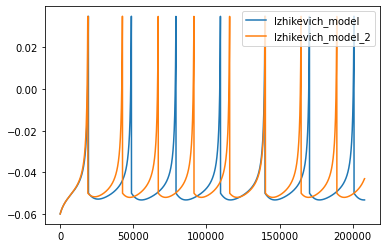

In [5]:
for model in models:
    plt.plot(model.get_membrane_potential(), label=model)
plt.legend();

In [6]:
# A new M2M test which will compare the equality of spike counts across models
from scidash_api.tests import RandomTest

In [7]:
random_test = RandomTest(observation={'mean':50, 'std':100, 'n': 1})

In [8]:
from neuronunit.tests.passive import InputResistanceTest
input_resistance_test = InputResistanceTest({'mean': 125.0*pq.MOhm,
                                             'std': 40.0*pq.MOhm,
                                             'n': 10})
suite = sciunit.TestSuite([random_test, input_resistance_test])

In [9]:
for model in models:
    model._backend.use_memory_cache = True

In [10]:
#model.get_list_attr_with_bases('state_hide')

In [11]:
sm = suite.judge(models)
import jsonpickle
x1 = jsonpickle.encode(models[0])

Score: Z = -0.43 for Izhikevich_model on RandomTest
Score: Z = -1.13 for Izhikevich_model on InputResistanceTest
Score: Z = -0.42 for Izhikevich_model_2 on RandomTest
Score: Z = -1.13 for Izhikevich_model_2 on InputResistanceTest


In [12]:
sm = suite.judge(models)
import jsonpickle
x2 = jsonpickle.encode(models[0])

Score: Z = -0.50 for Izhikevich_model on RandomTest
Score: Z = -1.13 for Izhikevich_model on InputResistanceTest
Score: Z = -0.50 for Izhikevich_model_2 on RandomTest
Score: Z = -1.13 for Izhikevich_model_2 on InputResistanceTest


In [13]:
def check_url(x):
    if not x.json(string=False).get('url'):
        print("Model has no associated url; please set the url attribute of the model")
check_url(models[0])

In [14]:
# How do you want your GitHub URLs?  
lems_url = ("https://github.com/scidash/neuronunit/blob/master/neuronunit/"
            "models/NeuroML2/LEMS_2007One.xml")
models[0]._url = lems_url
models[1]._url = lems_url

In [15]:
check_url(models[0])

In [16]:
from scidash_api import client, settings
url = settings.get_config('ip')
client_instance = client.ScidashClient({"base_url": url},
                                       hostname="Host's machine")
client_instance.login(username='admin',
                      password='admin_test')
len(client_instance.token)

180

In [17]:
import json
from deepdiff import DeepDiff
x1 = sm.json(add_props=True, string=False)
x1 = sm.json(add_props=True, string=False)
x2 = json.loads(sm.json(add_props=True, string=True))
assert DeepDiff(x1, x2) == {}

In [18]:
score = sm['Izhikevich_model', 'InputResistanceTest']
score.json(add_props=True, string=False)['observation']

{'mean': {'py/reduce': [{'py/function': 'quantities.quantity._reconstruct_quantity'},
   ['quantities.quantity.Quantity', 'numpy.ndarray', [0], 'b'],
   [1,
    [],
    {'py/id': 11},
    False,
    {'py/b64': 'AAAAAABAX0A='},
    {'py/object': 'quantities.dimensionality.Dimensionality',
     "UnitQuantity('megaohm', 1000.0 * kiloohm)": 1,
     '__dict__': {}}]]},
 'std': {'py/reduce': [{'py/function': 'quantities.quantity._reconstruct_quantity'},
   ['quantities.quantity.Quantity', 'numpy.ndarray', [0], 'b'],
   [1,
    [],
    {'py/id': 11},
    False,
    {'py/b64': 'AAAAAAAAREA='},
    {'py/object': 'quantities.dimensionality.Dimensionality',
     "UnitQuantity('megaohm', 1000.0 * kiloohm)": 1,
     '__dict__': {}}]]},
 'n': 10}

In [19]:
#score.test.json(add_props=True, simplify=True, string=False)['observation']

In [20]:
responses = client_instance.upload_test_score(score)

a1fb131221bfbc23f81cd0ca7cf10224761b30a23574c982d2ab583a


ERROR:scidash_api.client:SERVER -> INVALID DATA: ['{"success":false,"errors":{"test_instance":{"non_field_errors":["Can\'t instantiate class, reason candidates: {\'observation\': [\'none or more than one rule validate\', {\'oneof definition 0\': [{\'mean\': [\'required field\'], \'py/id\': [\'unknown field\'], \'std\': [\'required field\']}], \'oneof definition 1\': [{\'mean\': [\'required field\'], \'n\': [\'required field\'], \'py/id\': [\'unknown field\'], \'sem\': [\'required field\']}]}]}"]}}}']


In [21]:
pprint(responses.json())

{'errors': {'test_instance': {'non_field_errors': ["Can't instantiate class, "
                                                   'reason candidates: '
                                                   "{'observation': ['none or "
                                                   'more than one rule '
                                                   "validate', {'oneof "
                                                   "definition 0': [{'mean': "
                                                   "['required field'], "
                                                   "'py/id': ['unknown "
                                                   "field'], 'std': ['required "
                                                   "field']}], 'oneof "
                                                   "definition 1': [{'mean': "
                                                   "['required field'], 'n': "
                                                   "['required field'], "
           